<a href="https://colab.research.google.com/github/Miit-009/Jio-Institute/blob/main/Session_10_(12_Feb)_PCA_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'pca.xlsx'  # Path to your Excel file
data = pd.read_excel(file_path)

# Drop the non-numeric column 'country' as PCA works only with numerical data
data_numeric = data.drop(columns=['country'])

# Standardize the data (mean=0, variance=1)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# Perform PCA - specify the number of components you want to reduce to
pca = PCA(n_components=2)  # Reduce to 2 principal components, you can change this value as needed
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])

# Optionally, add the country column back
pca_df['country'] = data['country']

# Show the result
print(pca_df)

# To see the explained variance ratio (how much variance each principal component explains)
print("Explained variance ratio:", pca.explained_variance_ratio_)


          PC1       PC2              country
0   -2.913025  0.095621          Afghanistan
1    0.429911 -0.588156              Albania
2   -0.285225 -0.455174              Algeria
3   -2.932423  1.695555               Angola
4    1.033576  0.136659  Antigua and Barbuda
..        ...       ...                  ...
162 -0.820631  0.639570              Vanuatu
163 -0.551036 -1.233886            Venezuela
164  0.498524  1.390744              Vietnam
165 -1.887451 -0.109453                Yemen
166 -2.864064  0.485998               Zambia

[167 rows x 3 columns]
Explained variance ratio: [0.4595174  0.17181626]


PCA Component Loadings:
                 PC1       PC2
child_mort -0.419519  0.192884
exports     0.283897  0.613163
health      0.150838 -0.243087
imports     0.161482  0.671821
income      0.398441  0.022536
inflation  -0.193173 -0.008404
life_expec  0.425839 -0.222707
total_fer  -0.403729  0.155233
gdpp        0.392645 -0.046022
PC1 is primarily correlated with: life_expec
PC2 is primarily correlated with: imports


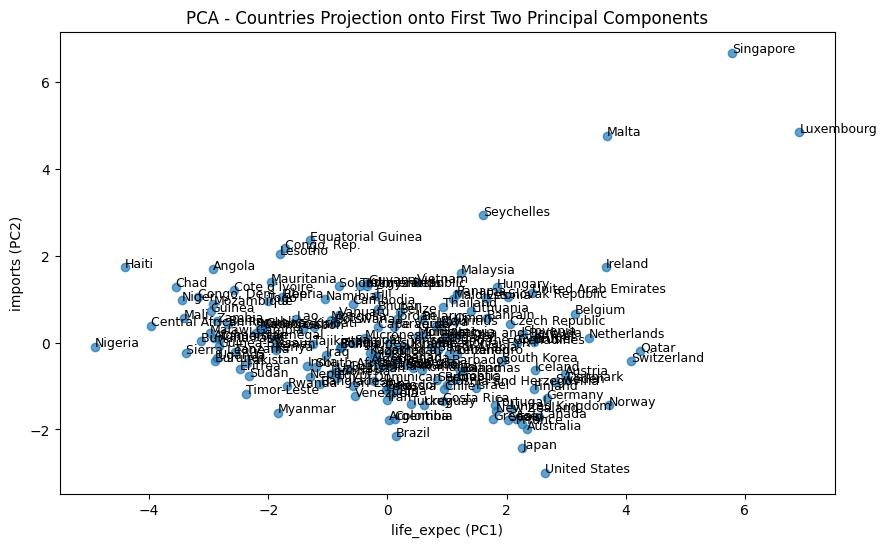

Explained Variance by PCA components: [0.4595174  0.17181626]
Total Variance Explained: 0.6313336543771411


In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("pca.xlsx")

# Select the relevant columns for PCA (excluding 'country' as it's categorical)
data_for_pca = data.drop(columns=['country'])

# Standardizing the data before applying PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Apply PCA
pca = PCA(n_components=2)  # You can adjust n_components to reduce to more/less components
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Add the country column back for reference
pca_df['country'] = data['country']

# Get the component loadings (correlations between features and principal components)
loadings = pca.components_.T  # Transpose to align with original features

# Create a DataFrame of the loadings for better visualization
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=data_for_pca.columns)

# Display loadings
print("PCA Component Loadings:")
print(loadings_df)

# Naming PC1 and PC2 based on the loadings
# You can manually inspect the highest and lowest values to determine what each component represents
pc1_name = loadings_df['PC1'].idxmax()  # Feature with highest correlation for PC1
pc2_name = loadings_df['PC2'].idxmax()  # Feature with highest correlation for PC2

# Displaying the component names
print(f"PC1 is primarily correlated with: {pc1_name}")
print(f"PC2 is primarily correlated with: {pc2_name}")

# Plotting the PCA results (First two principal components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
for i, country in enumerate(pca_df['country']):
    plt.text(pca_df['PC1'][i], pca_df['PC2'][i], country, fontsize=9)

plt.title('PCA - Countries Projection onto First Two Principal Components')
plt.xlabel(f'{pc1_name} (PC1)')
plt.ylabel(f'{pc2_name} (PC2)')
plt.show()

# Explained variance
print(f'Explained Variance by PCA components: {pca.explained_variance_ratio_}')
print(f'Total Variance Explained: {sum(pca.explained_variance_ratio_)}')

# Save the result as a new Excel file if needed
data_pca = pd.concat([data, pca_df[['PC1', 'PC2']]], axis=1)
data_pca.to_excel("pca_result_named.xlsx", index=False)


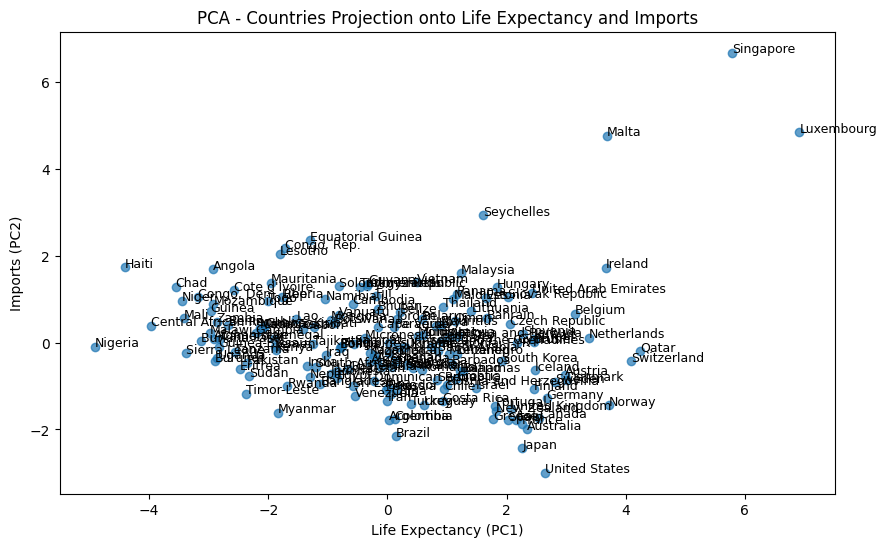

Explained Variance by PCA components: [0.4595174  0.17181626]
Total Variance Explained: 0.6313336543771411


In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_excel("pca.xlsx")

# Select the relevant columns for PCA (excluding 'country' as it's categorical)
data_for_pca = data.drop(columns=['country'])

# Standardizing the data before applying PCA
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_pca)

# Apply PCA
pca = PCA(n_components=2)  # You can adjust n_components to reduce to more/less components
pca_result = pca.fit_transform(data_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Add the country column back for reference
pca_df['country'] = data['country']

# Rename PC1 and PC2 based on the correlation analysis
pca_df.rename(columns={'PC1': 'Life Expectancy', 'PC2': 'Imports'}, inplace=True)

# Plotting the PCA results (First two principal components)
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Life Expectancy'], pca_df['Imports'], alpha=0.7)
for i, country in enumerate(pca_df['country']):
    plt.text(pca_df['Life Expectancy'][i], pca_df['Imports'][i], country, fontsize=9)

plt.title('PCA - Countries Projection onto Life Expectancy and Imports')
plt.xlabel('Life Expectancy (PC1)')
plt.ylabel('Imports (PC2)')
plt.show()

# Explained variance
print(f'Explained Variance by PCA components: {pca.explained_variance_ratio_}')
print(f'Total Variance Explained: {sum(pca.explained_variance_ratio_)}')

# Save the result as a new Excel file if needed
data_pca = pd.concat([data, pca_df[['Life Expectancy', 'Imports']]], axis=1)
data_pca.to_excel("pca_result_named.xlsx", index=False)
